# Importing the required libraries

In [139]:
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# Importing the dataset

In [140]:
df = pd.read_csv("diabetes.csv")
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Clearing the data
value of Blood Pressure can not be zero thus changing it to Nan

In [141]:
df.iloc[:,2]   = df.iloc[:,2].replace(0, np.nan)
impute = SimpleImputer(missing_values=np.nan, strategy="mean")
impute = impute.fit(df.iloc[:,2:3] )
df.iloc[:,2:3] = impute.transform(df.iloc[:,2:3])
df.head(30)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.000000,35,0,33.6,0.627,50,1
1,1,85,66.000000,29,0,26.6,0.351,31,0
2,8,183,64.000000,0,0,23.3,0.672,32,1
3,1,89,66.000000,23,94,28.1,0.167,21,0
4,0,137,40.000000,35,168,43.1,2.288,33,1
5,5,116,74.000000,0,0,25.6,0.201,30,0
6,3,78,50.000000,32,88,31.0,0.248,26,1
7,10,115,72.405184,0,0,35.3,0.134,29,0
8,2,197,70.000000,45,543,30.5,0.158,53,1
9,8,125,96.000000,0,0,0.0,0.232,54,1


# Scaling down our data

In [142]:
scaler = StandardScaler()
scaler.fit(df.drop('Outcome',axis=1))
scaled_features = scaler.transform(df.drop('Outcome',axis=1))
scaler_trans = pd.DataFrame(scaled_features,columns=df.columns[:-1])
scaler_trans.head() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,-0.033518,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.529859,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.695306,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.529859,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-2.680669,0.907270,0.765836,1.409746,5.484909,-0.020496


# Finding out right model
The KNN model or SVM would fit the best no straight line can distinguish so logistic regresson is out, Random Forest will require more distinguishable data so it is also out.

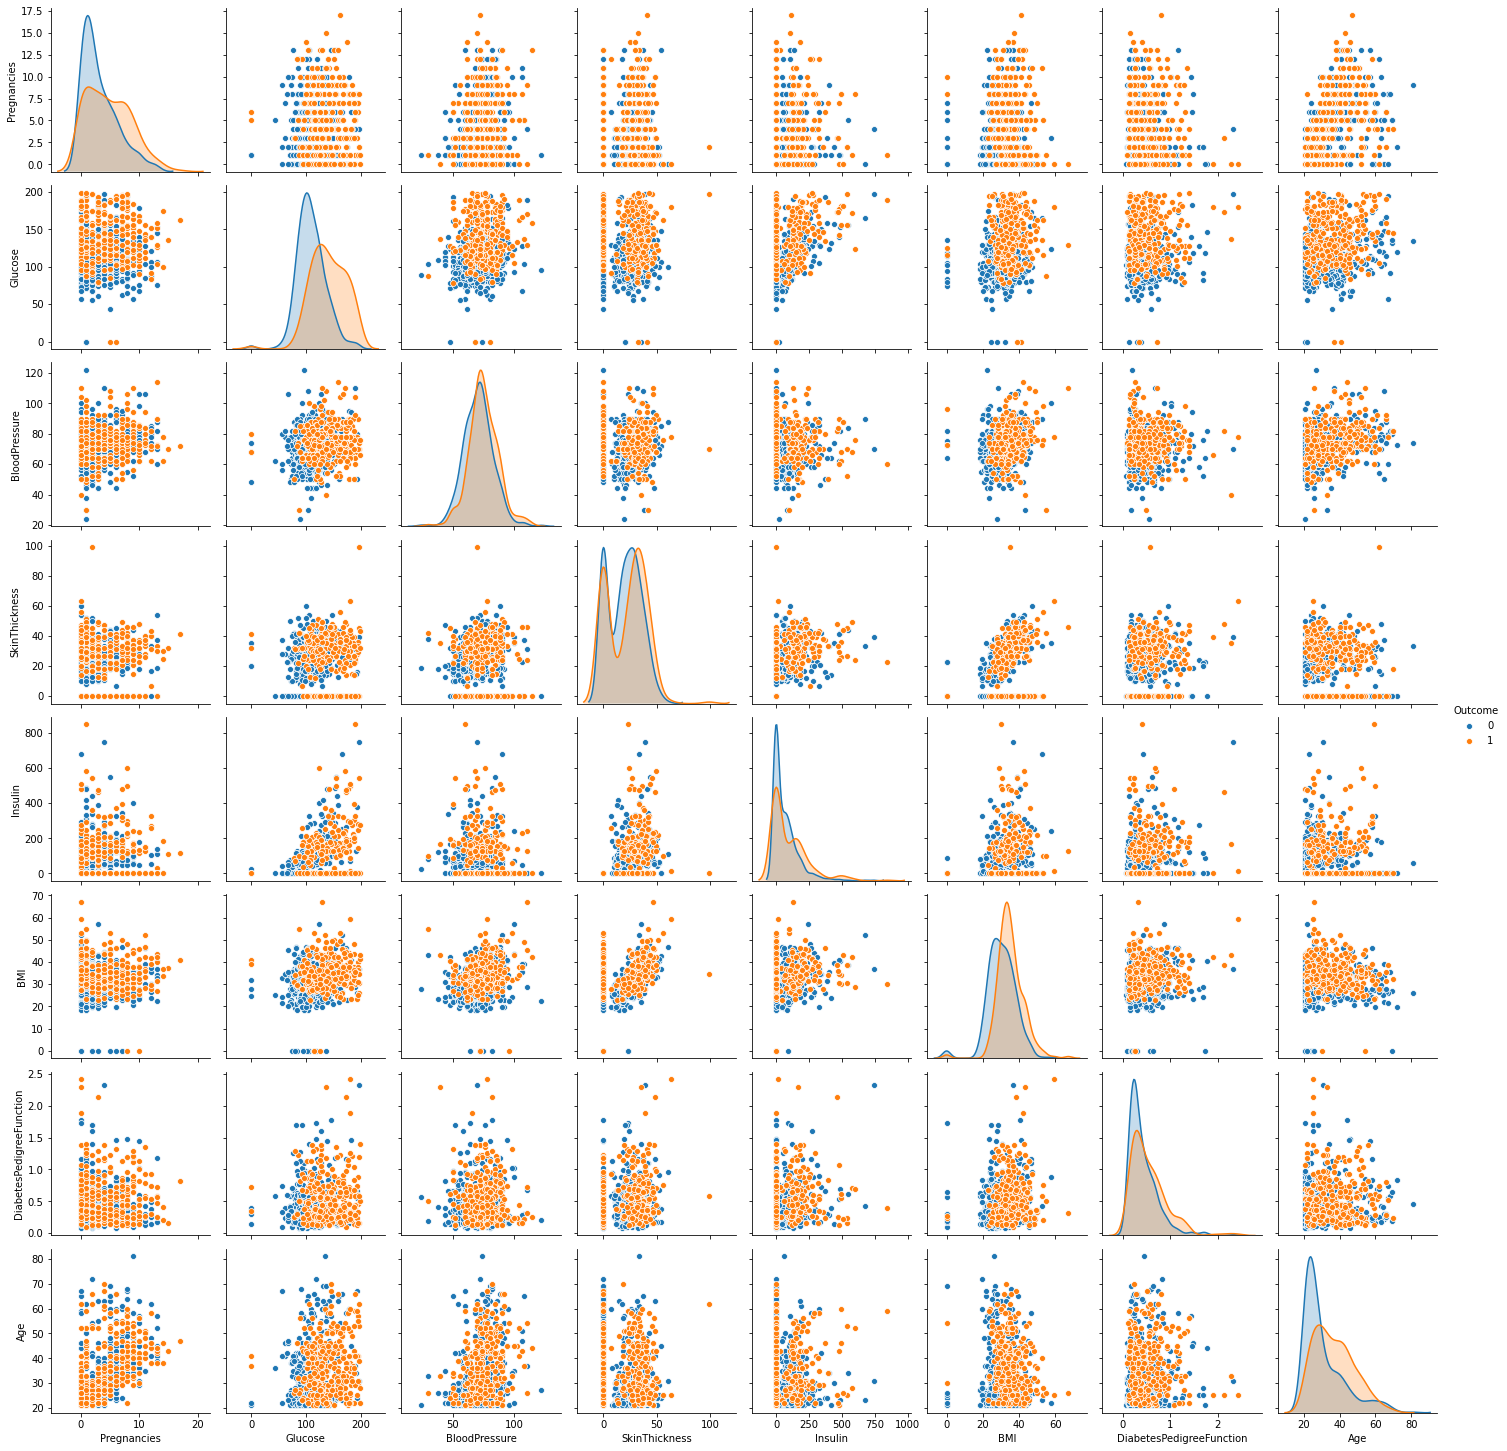

In [143]:
sns.pairplot(df,hue = 'Outcome' )

# Splitting the data

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=0)


#Feature Scaling

In [162]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fitting Classifier to training set

In [163]:
classifier = SVC(kernel='rbf',random_state=0)
classifier.fit(X_train, y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

# Predicting the Test set results

In [164]:
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix


In [160]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[33  4]
 [ 5 12]]


In [165]:
y_pred,y_test

(array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]),
 array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0]))